In [1]:
import scipy.io.wavfile
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.signaltools as sigtool
rate, data = scipy.io.wavfile.read('a0080.wav')

LenSig = len(data)

# What does the data look like?

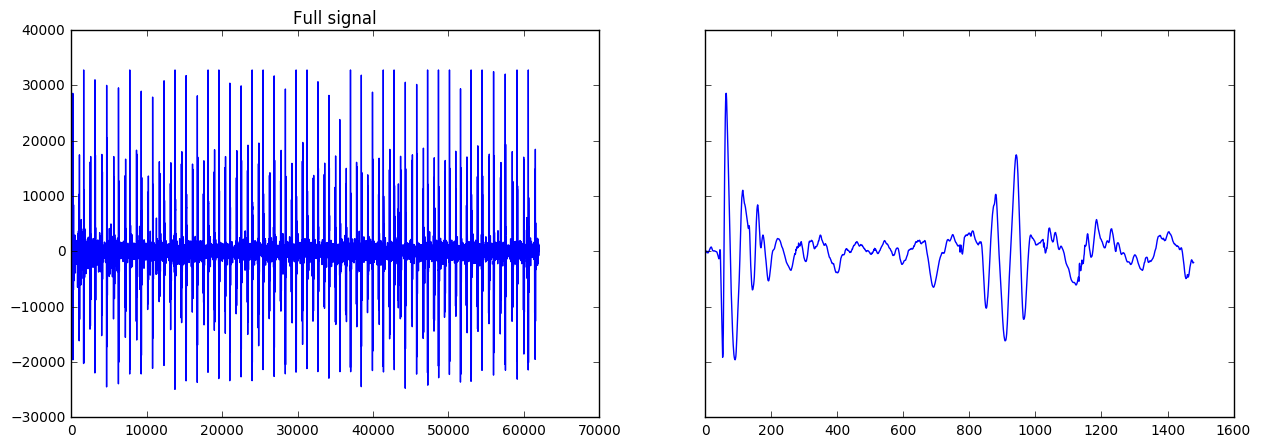

In [2]:
data = np.asarray(data)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1.plot(data)
ax1.set_title('Full signal')
ax2.plot(data[170:1650])
plt.show()

## Exploring the spectrum of the signal

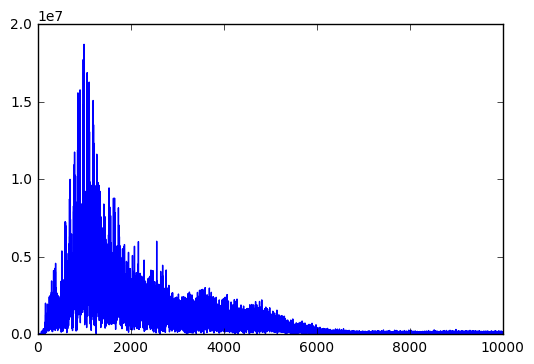

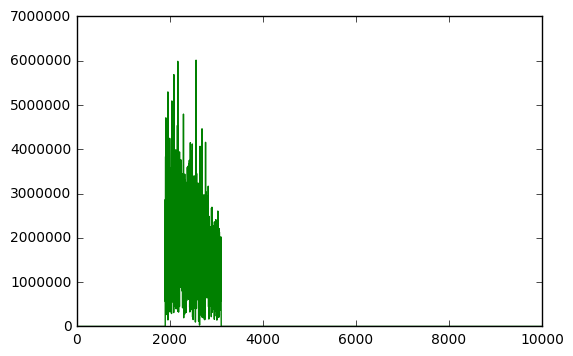

In [14]:
FFT = np.fft.fft(data)
FFTClean = np.fft.fft(data)
FFTClean1500 = np.fft.fft(data)
FFTClean2500 = np.fft.fft(data)
Fcenter = np.argmax(np.abs(FFT[0:10000]))
plt.plot(np.abs(FFT[0:10000]))
plt.show()

WinWidth = 300



for i in range(len(FFT)/2):
    if (abs(Fcenter-i) > WinWidth):
        FFTClean[i] = 0
        FFTClean[-i] = 0
    if (abs(1500-i) > 2*WinWidth):
        FFTClean1500[i] = 0
        FFTClean1500[-i] = 0
    if (abs(2500-i) > 2*WinWidth):
        FFTClean2500[i] = 0
        FFTClean2500[-i] = 0
        
plt.plot(np.abs(FFTClean2500[0:10000]),"g")
plt.show()

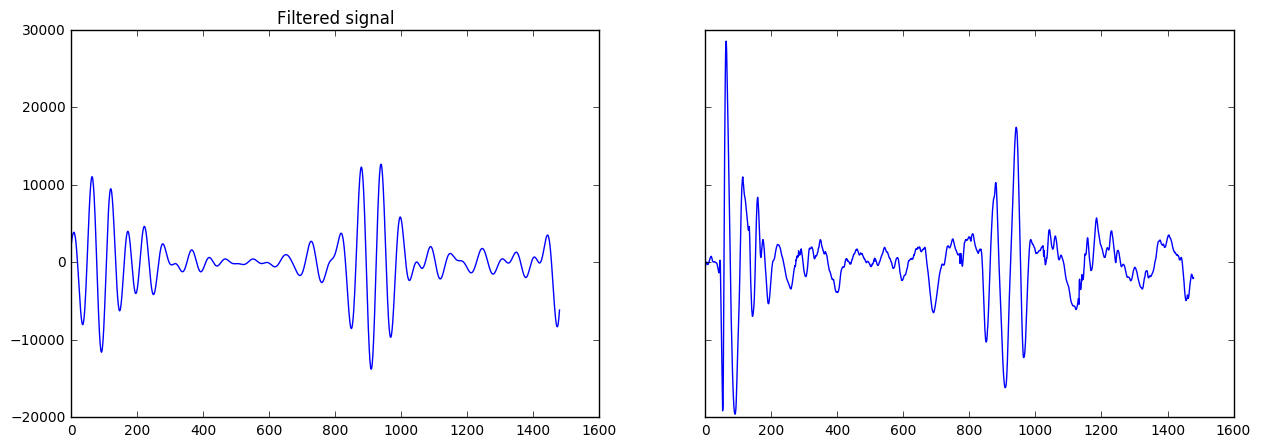

In [15]:
FFTed = np.real(np.fft.ifft(FFTClean))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1.plot(data[170:1650])
ax1.set_title('Filtered signal')
ax2.plot(FFTed[170:1650])
plt.show()

## We can try and normalize the data

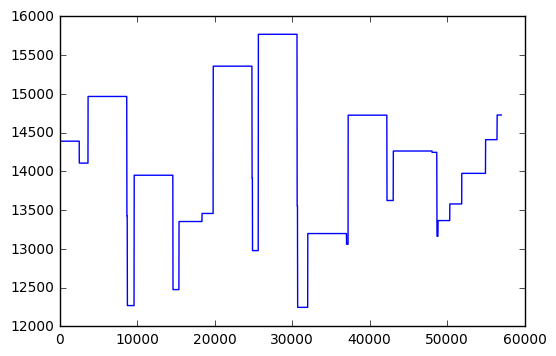

In [16]:
Maxes = []
for k in range(LenSig-5000): # length of two pulses
    Maxes.append(np.amax(FFTed[k:k+5000]))
plt.plot(Maxes)
plt.show()

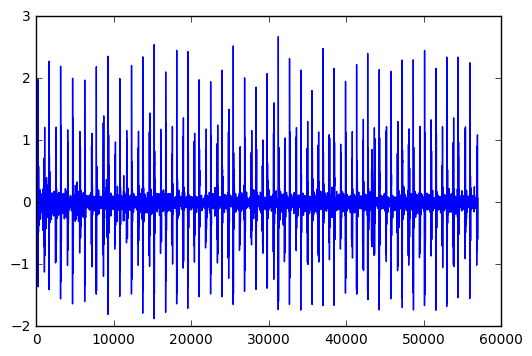

In [17]:
CleanData = []
for k in range(LenSig-5000):
        CleanData.append(data[k]/Maxes[k])
        FFTed
plt.plot(CleanData)
plt.show()

## Let's see if our first segmentation worked !

In [20]:
env = np.abs(sigtool.hilbert(FFTed)) # hilbert(s) actually returns the analytical signal
Pulses = np.asarray(env/9000,dtype=int)
IndexPulses = [] 
for i in range(len(Pulses)-1):
    if (not(Pulses[i]) and Pulses[i+1]):
        IndexPulses.append(i)


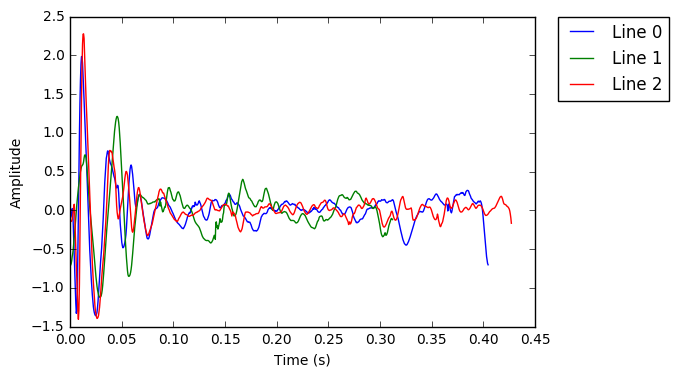

In [23]:
for k in range(3):
    t = [1.0*x/rate for x in range(IndexPulses[k+1]-IndexPulses[k])]
    plt.plot(t,CleanData[IndexPulses[k]:IndexPulses[k+1]], label='Line '+str(k))
plt.ylabel('Amplitude')
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

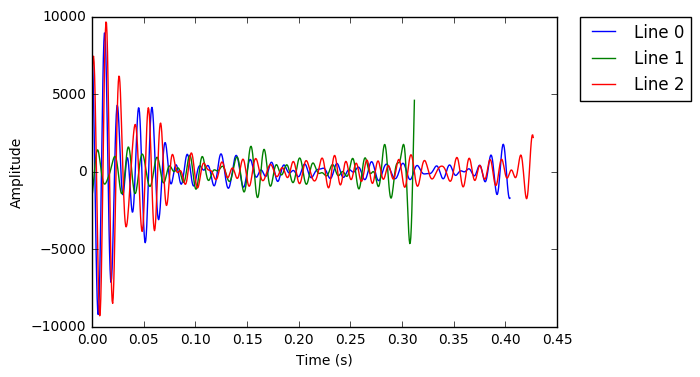

In [26]:
FFTed1500 = np.real(np.fft.ifft(FFTClean1500))
FFTed2500 = np.real(np.fft.ifft(FFTClean2500))

for k in range(3):
    t = [1.0*x/rate for x in range(IndexPulses[k+1]-IndexPulses[k])]
    plt.plot(t,FFTed2500[IndexPulses[k]:IndexPulses[k+1]], label='Line '+str(k))
plt.ylabel('Amplitude')
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Abnormal data

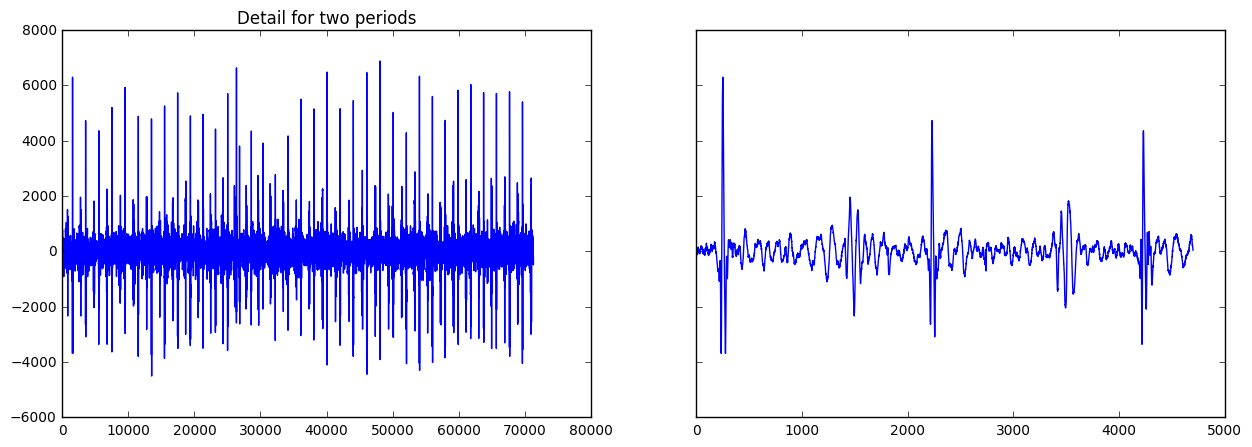

In [53]:
rate, data = scipy.io.wavfile.read('a0001.wav')
data = np.asarray(data)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1.plot(data)
ax1.set_title('Full signal')
ax2.plot(data[1300:6000])
ax1.set_title('Detail for two periods')
plt.show()

Let's normalize the data

In [54]:
WinMax = 2000
Maxes = []
for k in range(len(data)-WinMax): # length of two pulses
    Maxes.append(np.amax(np.abs(data[k:k+WinMax])))
    
CleanData = []
for k in range(LenSig-WinMax):
        CleanData.append(1.0*data[k]/Maxes[k])

In [67]:
FFT = np.fft.fft(CleanData)
FFTClean = np.fft.fft(CleanData)
Fcenter = np.argmax(np.abs(FFT[0:10000]))

WinWidth = 300

for i in range(len(FFT)/2):
    if (abs(Fcenter-i) > 2*WinWidth):
        FFTClean[i] = 0
        FFTClean[-i] = 0
        

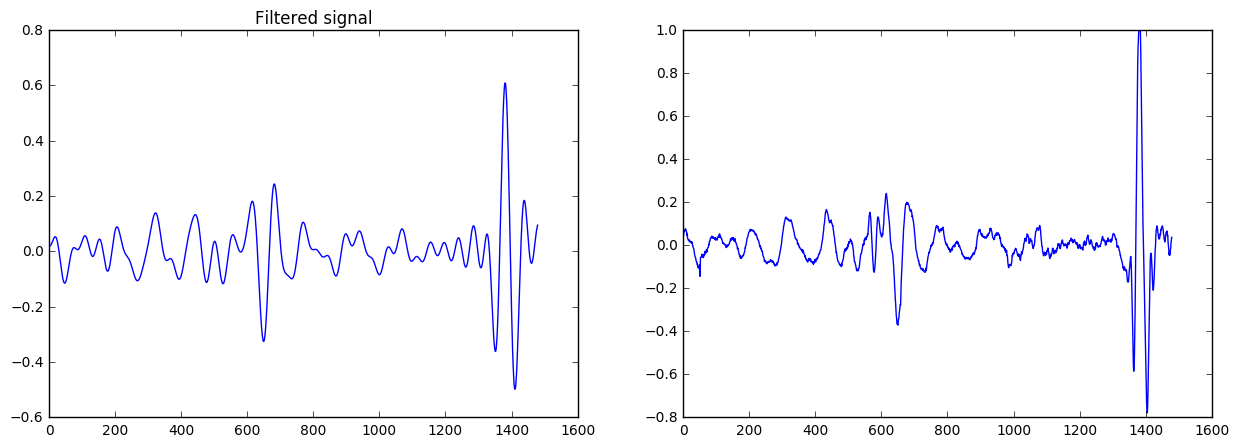

In [68]:
iFFTAbnormal = np.real(np.fft.ifft(FFTClean))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(iFFTAbnormal[170:1650])
ax1.set_title('Filtered signal')
ax2.plot(CleanData[170:1650])
plt.show()

#### Creating the pulses index

In [47]:
env = np.abs(sigtool.hilbert(FFTed))/0.75 # hilbert(s) actually returns the analytical signal
Pulses = np.asarray(env,dtype=int)
IndexPulses = [] 
for i in range(len(Pulses)-1):
    if (not(Pulses[i]) and Pulses[i+1]):
        IndexPulses.append(i)

#### Let's see if there's an abnormality appearing

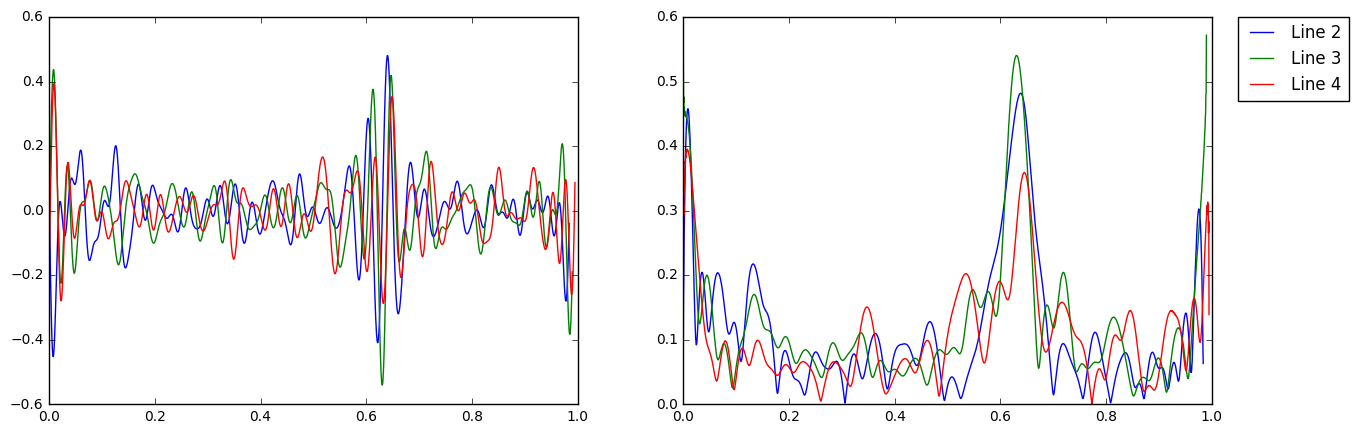

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))



for k in range(3):
    k = k +2
    t = [1.0*x/rate for x in range(IndexPulses[k+1]-IndexPulses[k])]
    ax1.plot(t,iFFTAbnormal[IndexPulses[k]:IndexPulses[k+1]], label='Line '+str(k))

for k in range(3):
    k = k +2
    t = [1.0*x/rate for x in range(IndexPulses[k+1]-IndexPulses[k])]
    ax2.plot(t,np.abs(sigtool.hilbert(iFFTAbnormal[IndexPulses[k]:IndexPulses[k+1]])), label='Line '+str(k))


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

